In [2]:
import pandas as pd
from sklearn import tree
import matplotlib as plt
%matplotlib inline

In [2]:
titanic_data = pd.read_csv('train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
X = titanic_data.drop(['PassengerId','Name','Survived','Ticket','Cabin'], axis = 1)
Y = titanic_data.Survived
X = pd.get_dummies(X)
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [5]:
X.isnull().sum()

Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [6]:
X = X.fillna({'Age' : X.Age.median()})

In [7]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf.fit(X,Y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

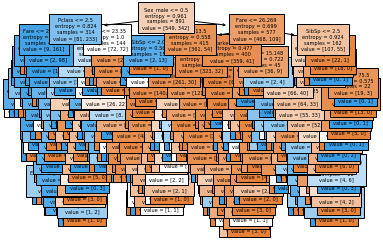

In [8]:

tree.plot_tree(clf,feature_names=list(X), filled=True,fontsize= 5);

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.33)
X_train.shape

(596, 10)

In [11]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
clf.fit(X_train,Y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
clf.score(X_test,Y_test)

0.8033898305084746

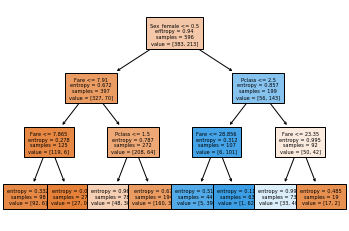

In [13]:
tree.plot_tree(clf,feature_names=list(X), filled=True,fontsize= 5);

In [14]:
depth = range(1,100)
data = pd.DataFrame()

In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
for each_depth in depth:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = each_depth)
    clf.fit(X_train,Y_train)
    new_cross_val_score = cross_val_score(clf,X_train,Y_train , cv = 5).mean()
    train_score = clf.score(X_train,Y_train)
    test_score = clf.score(X_test,Y_test)
    data = data.append(pd.DataFrame({'depth':[each_depth],
                 'train_score':[train_score],
                 'test_score' : [test_score], 'cross_val_score':[new_cross_val_score]}))
data.sort_values(['test_score'],ascending =0).head()

,depth,train_score,test_score,cross_val_score
0,5,0.852349,0.820339,0.793557
0,4,0.817114,0.813559,0.800308
0,9,0.919463,0.806780,0.771807
0,14,0.973154,0.803390,0.758277
0,3,0.813758,0.803390,0.807003


In [17]:
data = pd.melt(data,id_vars = ['depth'],
               value_vars = ['train_score','test_score','cross_val_score'],
               var_name = ['set_type'],value_name = 'score')

In [18]:
data.head()

,depth,set_type,score
0,1,train_score,0.788591
1,2,train_score,0.802013
2,3,train_score,0.813758
3,4,train_score,0.817114
4,5,train_score,0.852349


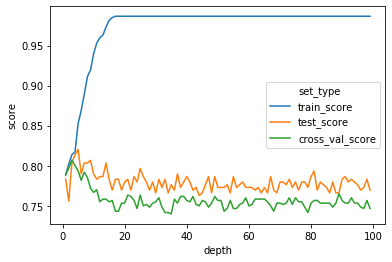

In [19]:
import seaborn as sns
sns.lineplot(x = 'depth', y = 'score', hue ='set_type' , data =data );

In [20]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)
new_cross_val_score = cross_val_score(clf,X_train,Y_train , cv = 5)
new_cross_val_score

array([0.80833333, 0.78991597, 0.81512605, 0.78991597, 0.78151261])

In [21]:
best_clf = tree.DecisionTreeClassifier(max_depth=10)
best_clf.fit(X_train, y_train)
best_clf.score(X_test, y_test)

NameError: name 'y_train' is not defined

In [22]:
params = {'criterion' : ['gini', 'entropy'],'max_depth' : range(1,35)}
clf = tree.DecisionTreeClassifier()

In [32]:
from sklearn.model_selection import GridSearchCV
new_clf = GridSearchCV(clf,params, cv=10)
new_clf.fit(X_train,Y_train)
new_clf.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [35]:
new_clf.score(X_test,Y_test)

0.8203389830508474

In [1]:
print('sdfvsd')

sdfvsd


In [4]:
np.array([1,2,3,45]).plot()

NameError: name 'np' is not defined